# Long-term Air Pollution Level Trend in New York City with the Clean Heat Program (CHP)
## Final Project for EESC GR6901: Research Computing for the Earth Sciences
Yuwei Zhao <br>
December 2022

## Project Goals
Air pollution such as fine particulate matter (PM 2.5), SO$_2$, NO$_x$, and CO can cause harm to human health and the environment worldwide. According to World Health Organization (WHO), in 2016, outdoor air pollution was estimated to cause 4.2 million premature death globally. One of the main outdoor air pollution sources are household energy for heating and cooking(World Health Organization, 2022). 
<br>

<br>
In 2012, New York City (NYC) established the Clean Heat Program (CHP) to ban #6 heating oil, and switch to cleaner heating fuel which has fewer sulfur and reactive nitrogen emissions during combustion. The #6 heating oil ban started in 2012 and was completed in 2016 (Berger, 2021). The purposes of the project are to look at the impacts of CHP on air quality in NYC and to analyze the chemical composition changes in combustion emissions after heating oil conversion.
<br>

<br>
I looked at the trend of SO$_2$, NO$_x$, CO, and speciated PM 2.5 (sulfate, nitrate, ammonium) trend in NYC and NJ. In each area, I picked 2~4 monitor sites. 
<br>

<br>
References
<br>

<br>
Berger, S. (2021, December 8). Study shows success of New York City's Clean Heat Program. Search the website. Retrieved September 25, 2022, from https://www.publichealth.columbia.edu/public-health-now/news/study-shows-success-new-york-citys-clean-heat-program
<br>

<br>
World Health Organization. (2022). Air Pollution. World Health Organization. Retrieved December 5, 2022, from https://www.who.int/health-topics/air-pollution#tab=tab_2 

# Import all the package and function needed

In [1]:
%reset -f
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import io
import requests
import json
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',500)
import datetime
from sklearn.linear_model import LinearRegression
custom_xlim = ([datetime.date(2009, 12, 1), datetime.date(2022, 12, 31)])

# Read in all years data from Environmental Protection Agency (EPA) into dataframe at once

The original datasets are on Air Quality System (AQS) API EPA database in daily data format. The URL to load data has a one-year time period limitation together with one pollutant species limitation. Since the data I need is the longtime period with multiple air pollutant species, I wrote a for loop to grab all years' .json data to dataframe at once. There are two ways to apply the for loop, one is to use the dictionary to loop through all 7 pollutants for 22 years in both NYC and NJ, and the other is to put in the area and pollutant you want, and it gets 12 years data for that specific pollutants only. Since the dataset is huge, when applying the first method to run the full for loop, the server breaks down. Therefore I applied the second one. But the code that applies the dictionary and full loop is in the appendix section at the end.
<br>

<br>
The individual pollutant data was saved as .txt file for future use. 

In [2]:
url_base= 'https://aqs.epa.gov/data/api/dailyData/byState?email=yz4343@columbia.edu&key=saffronhawk77'
def info(param,year,state):
    url_info = '&param='+ str(param) + '&bdate=' + str(year) +'0101&edate=' + str(year) +'1231&state=' + str(state)
    return url_info
Y = np.arange(2010,2023,1) # Time range
df_ap = pd.DataFrame()
param = 42401am
state = 36#State
if param == 42101:
    name = 'CO'
if param == 88301:
    name = 'Ammonium_PM2.5'
if param == 88403:
    name = 'Sulfate_PM2.5'
if param == 88306:
    name = 'Nitrate_PM2.5'
if param == 42603:
    name = 'NOx'
if param == 42602:
    name = 'NO2'
if param == 42401:
    name = 'SO2'
if state == 36:
    s_name = 'NY'
if state == 34:
    s_name = 'NJ'
print('AP Name: ', name,'State: ',s_name)
for i in range(0,len(Y)):
    year = Y[i]
    url_info = info(param,year,state)
    url_base = 'https://aqs.epa.gov/data/api/dailyData/byState?email=yz4343@columbia.edu&key=saffronhawk77'
    url = url_base + url_info
    response = requests.get(url).json();
    Data = response['Data'];
    df = pd.json_normalize(response['Data']);
    df_ap = pd.concat([df_ap,df])
df_ap.to_csv("{}_{}.txt".format(name,s_name))
df_ap

AP Name:  Ammonium_PM2.5 State:  NJ


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,sample_duration,pollutant_standard,date_local,units_of_measure,event_type,observation_count,observation_percent,validity_indicator,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,34,023,0006,88301,5,40.472825,-74.422403,WGS84,Ammonium Ion PM2.5 LC,7,24 HOUR,None,2010-12-25,Micrograms/cubic meter (LC),No Events,1,100.0,Y,0.432,0.432,0,None,812,Met One SASS/SuperSASS Nylon - Ion Chromatography,New Brunswick,"Cook College, Log Cabin Road near Horticulture...",New Jersey,Middlesex,North Brunswick Township,35620,"New York-Newark-Jersey City, NY-NJ-PA",2016-03-09
1,34,023,0006,88301,5,40.472825,-74.422403,WGS84,Ammonium Ion PM2.5 LC,7,24 HOUR,None,2010-12-22,Micrograms/cubic meter (LC),No Events,1,100.0,Y,0.345,0.345,0,None,812,Met One SASS/SuperSASS Nylon - Ion Chromatography,New Brunswick,"Cook College, Log Cabin Road near Horticulture...",New Jersey,Middlesex,North Brunswick Township,35620,"New York-Newark-Jersey City, NY-NJ-PA",2016-03-09
2,34,023,0006,88301,5,40.472825,-74.422403,WGS84,Ammonium Ion PM2.5 LC,7,24 HOUR,None,2010-12-19,Micrograms/cubic meter (LC),No Events,1,100.0,Y,1.750,1.750,0,None,812,Met One SASS/SuperSASS Nylon - Ion Chromatography,New Brunswick,"Cook College, Log Cabin Road near Horticulture...",New Jersey,Middlesex,North Brunswick Township,35620,"New York-Newark-Jersey City, NY-NJ-PA",2016-03-09
3,34,023,0006,88301,5,40.472825,-74.422403,WGS84,Ammonium Ion PM2.5 LC,7,24 HOUR,None,2010-12-16,Micrograms/cubic meter (LC),No Events,1,100.0,Y,1.410,1.410,0,None,812,Met One SASS/SuperSASS Nylon - Ion Chromatography,New Brunswick,"Cook College, Log Cabin Road near Horticulture...",New Jersey,Middlesex,North Brunswick Township,35620,"New York-Newark-Jersey City, NY-NJ-PA",2016-03-09
4,34,023,0006,88301,5,40.472825,-74.422403,WGS84,Ammonium Ion PM2.5 LC,7,24 HOUR,None,2010-12-10,Micrograms/cubic meter (LC),No Events,1,100.0,Y,0.618,0.618,0,None,812,Met One SASS/SuperSASS Nylon - Ion Chromatography,New Brunswick,"Cook College, Log Cabin Road near Horticulture...",New Jersey,Middlesex,North Brunswick Township,35620,"New York-Newark-Jersey City, NY-NJ-PA",2016-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,34,007,0002,88301,5,39.934559,-75.125219,NAD83,Ammonium Ion PM2.5 LC,7,24 HOUR,None,2022-01-29,Micrograms/cubic meter (LC),No Events,1,100.0,Y,0.540,0.540,0,None,812,Met One SASS/SuperSASS Nylon - Ion Chromatography,Camden Spruce Street,266-298 Spruce Street,New Jersey,Camden,Camden,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2022-11-10
220,34,007,0002,88301,5,39.934559,-75.125219,NAD83,Ammonium Ion PM2.5 LC,7,24 HOUR,None,2022-01-23,Micrograms/cubic meter (LC),No Events,1,100.0,Y,1.550,1.550,0,None,812,Met One SASS/SuperSASS Nylon - Ion Chromatography,Camden Spruce Street,266-298 Spruce Street,New Jersey,Camden,Camden,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2022-11-10
221,34,007,0002,88301,5,39.934559,-75.125219,NAD83,Ammonium Ion PM2.5 LC,7,24 HOUR,None,2022-01-17,Micrograms/cubic meter (LC),No Events,1,100.0,Y,0.450,0.450,0,None,812,Met One SASS/SuperSASS Nylon - Ion Chromatography,Camden Spruce Street,266-298 Spruce Street,New Jersey,Camden,Camden,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2022-11-10
222,34,007,0002,88301,5,39.934559,-75.125219,NAD83,Ammonium Ion PM2.5 LC,7,24 HOUR,None,2022-01-11,Micrograms/cubic meter (LC),No Events,1,100.0,Y,0.180,0.180,0,None,812,Met One SASS/SuperSASS Nylon - Ion Chromatography,Camden Spruce Street,266-298 Spruce Street,New Jersey,Camden,Camden,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2022-11-10


# Process each pollutant data, check their time continuity

## Read in individual pollutants

In [3]:
NOx_NY = pd.read_csv('NOx_NY.txt',header = [0],parse_dates=[13]);
NOx_NJ = pd.read_csv('NOx_NJ.txt',header = [0],parse_dates=[13]);
NO2_NY = pd.read_csv('NO2_NY.txt',header = [0],parse_dates=[13]);
NO2_NJ = pd.read_csv('NO2_NJ.txt',header = [0],parse_dates=[13]);
Data_CO = pd.read_csv('CO_NY.txt',header = [0],parse_dates=[13]);
Data_NOx = pd.read_csv('NOx_NY.txt',header = [0],parse_dates=[13]);
Data_SO2 = pd.read_csv('SO2_NY.txt',header = [0],parse_dates=[13]);
Data_S_PM = pd.read_csv('Sulfate_PM2.5_NY.txt',header = [0],parse_dates=[13]);
Data_N_PM = pd.read_csv('Nitrate_PM2.5_NY.txt',header = [0],parse_dates=[13]);
Data_NH_PM = pd.read_csv('Ammonium_PM2.5_NY.txt',header = [0],parse_dates=[13]);
Data_NO2= pd.read_csv('NO2_NY.txt',header = [0],parse_dates= [13]);
CO_NY = pd.read_csv('CO_NY.txt',header = [0],parse_dates=[13]);
CO_NJ = pd.read_csv('CO_NJ.txt',header = [0],parse_dates=[13]);
SO2_NY = pd.read_csv('SO2_NY.txt',header = [0],parse_dates=[13]);
SO2_NJ = pd.read_csv('SO2_NJ.txt',header = [0],parse_dates=[13]);
NH4_PM_NY = pd.read_csv('Ammonium_PM2.5_NY.txt',header = [0],parse_dates=[13]);
NH4_PM_NJ = pd.read_csv('Ammonium_PM2.5_NJ.txt',header = [0],parse_dates=[13]);
N_PM_NY = pd.read_csv('Nitrate_PM2.5_NY.txt',header = [0],parse_dates=[13]);
N_PM_NJ = pd.read_csv('Nitrate_PM2.5_NJ.txt',header = [0],parse_dates=[13]);
S_PM_NY = pd.read_csv('Sulfate_PM2.5_NY.txt',header = [0],parse_dates=[13]);
S_PM_NJ = pd.read_csv('Sulfate_PM2.5_NJ.txt',header = [0],parse_dates=[13]);

/tmp/ipykernel_2245/2197956138.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_SO2 = pd.read_csv('SO2_NY.txt',header = [0],parse_dates=[13]);
/tmp/ipykernel_2245/2197956138.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  SO2_NY = pd.read_csv('SO2_NY.txt',header = [0],parse_dates=[13]);


# Get the monitor site data needed

There are 12 air pollution monitor sites in NYC and 30 air pollution monitor sites in New Jersey, but in this project, we only need 5 in NYC and 4 in NJ. Therefore, the first step is to choose the site using the group-by in pandas. The difficulty to select the right dataset is that not all sites measure the same species, and maintenance and other operations which cause time gaps and repeated measuring during the same time are very common. The good thing is all the operations notes were recorded in datasets. In this case, it is important to plot the time continuity for each site and make sure the measurements are consistent and useful. 
<br>

<br>
I wrote functions to process each site and air pollutant individually because they can have different conditions and operations happened. 
<br>
The time continuity plots are needed for all sites with each pollutant, here I have only shown examples that show the time continuity of NOx before and after the data process (such as taking out the repeated recording with different air pollution standards, etc)

## NOx and NO2
### Time continuity

Text(0.5, 1.0, 'Time Continuity NOx Jersey City')

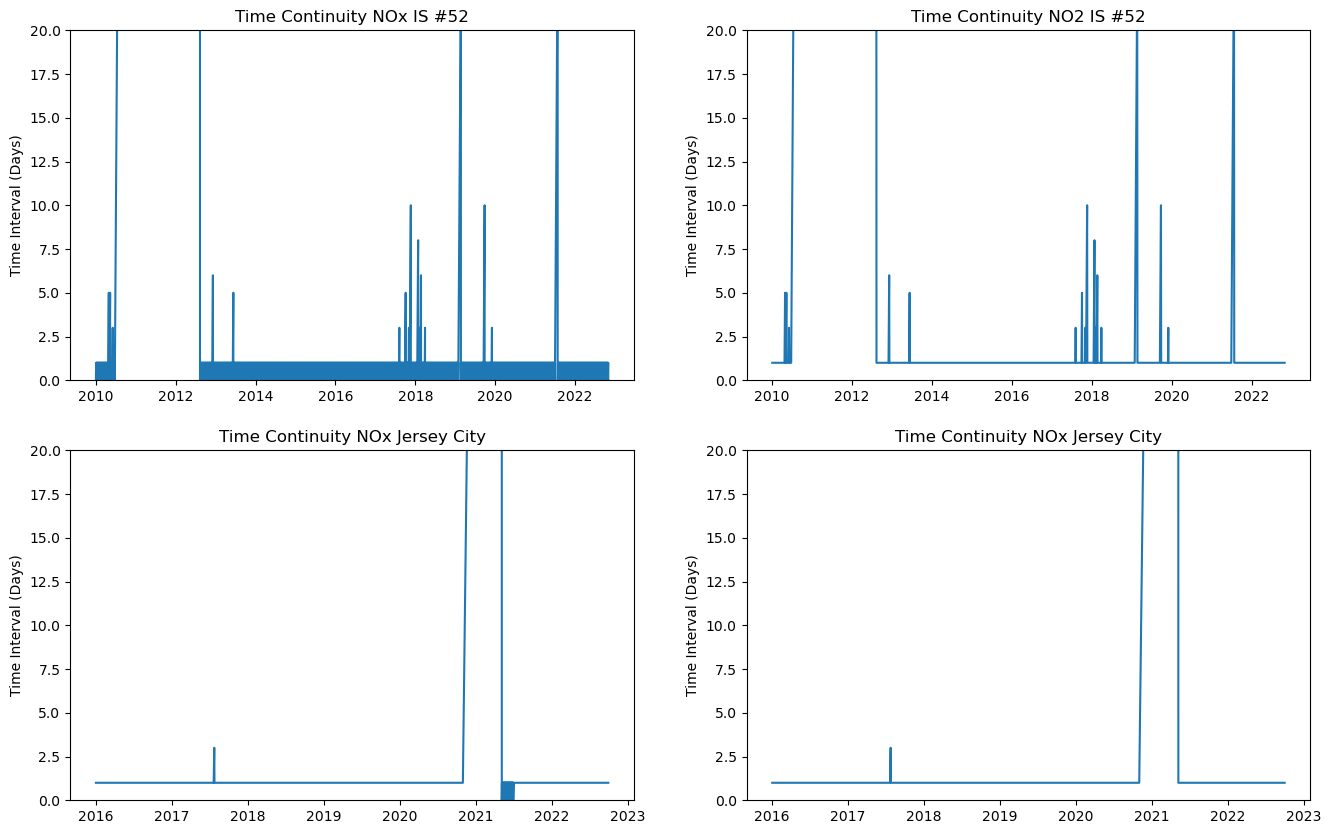

In [4]:
# NO2 and NOX
def process_data_no2(df,name):
    #Select Data that have 1 Hour Sample Duration
    df_method = df.loc[(df['sample_duration_code'] == 1)];

    # Group the data based on 'local_site_name'
    df_site = df_method.groupby('local_site_name')
    df_site_name = df_site.get_group("{}".format(name))

    df_site_name = df_site_name.sort_values(by="date_local")

    
    # Remove Event
    Ind = np.where(df_site_name['pollutant_standard'] == 'NO2 Annual 1971')
    df_site_name_RM = df_site_name.drop(df_site_name.index[Ind[0]])
    
        # Check time
    df_site_name_Diff = df_site_name_RM['date_local'].diff()
    days_df_name = df_site_name_Diff.astype('timedelta64[D]')
    return df_site_name_RM, days_df_name
def process_data_nox(df,name):
    #Select Data that have 1 Hour Sample Duration
    df_method = df.loc[(df['sample_duration_code'] == 1)];

    # Group the data based on 'local_site_name'
    df_site = df_method.groupby('local_site_name')
    df_site_name = df_site.get_group("{}".format(name))

    df_site_name = df_site_name.sort_values(by="date_local")
    # Check time
    df_site_name_Diff = df_site_name['date_local'].diff()
    days_df_name = df_site_name_Diff.astype('timedelta64[D]')
    
    return df_site_name, days_df_name
def process_data_nox_el(df,name):
    #Select Data that have 1 Hour Sample Duration
    df_method = df.loc[(df['sample_duration_code'] == 1)];

    # Group the data based on 'local_site_name'
    df_site = df_method.groupby('local_site_name')
    df_site_name = df_site.get_group("{}".format(name))

    df_site_name = df_site_name.sort_values(by="date_local")

    
    # Remove Event
    Ind = np.where(df_site_name['event_type'] == 'Events Included')
    df_site_name_RM = df_site_name.drop(df_site_name.index[Ind[0]])
    
        # Check time
    df_site_name_Diff = df_site_name_RM['date_local'].diff()
    days_df_name = df_site_name_Diff.astype('timedelta64[D]')
    return df_site_name_RM, days_df_name

NOx_site_IS52, days_NOx_IS52 = process_data_nox(NOx_NY,'IS 52')
NOx_site_PL, days_NOx_PL = process_data_nox(NOx_NY,'PFIZER LAB SITE')
NO2_site_IS52_ori, days_NO2_IS52_ori = process_data_nox(NO2_NY,'IS 52')
NO2_site_PL_ori, days_NO2_PL_ori = process_data_nox(NO2_NY,'PFIZER LAB SITE')
NO2_site_IS52, days_NO2_IS52 = process_data_no2(NO2_NY,'IS 52')
NO2_site_PL, days_NO2_PL = process_data_no2(NO2_NY,'PFIZER LAB SITE')
NOx_site_EL, days_NOx_EL = process_data_nox_el(NOx_NJ,'Elizabeth Lab')
NO2_site_EL, days_NO2_EL = process_data_no2(NO2_NJ,'Elizabeth Lab')
NO2_site_JC, days_NO2_JC = process_data_no2(NO2_NJ,'Jersey City')
NOx_site_JC, days_NOx_JC = process_data_nox_el(NOx_NJ,'Jersey City')
NOx_site_JC_ori, days_NOx_JC_ori = process_data_nox(NOx_NJ,'Jersey City')
NOx_site_EL_ori, days_NOx_EL_ori = process_data_nox(NOx_NJ,'Elizabeth Lab')

NOx_site_Queen, days_NOx_Queen = process_data_nox(NOx_NY,'QUEENS COLLEGE 2')
NO2_site_Queen, days_NO2_Queen = process_data_no2(NO2_NY, 'QUEENS COLLEGE 2')
fig1 = plt.figure(1,figsize=(16,10))

ax1 = plt.subplot(2,2,1)
plt.plot(NO2_site_IS52_ori['date_local'],days_NO2_IS52_ori)
ax1.set_ylabel('Time Interval (Days)')
ax1.set_ylim(0,20)
plt.title('Time Continuity NOx IS #52')

ax2 = plt.subplot(2,2,2)
plt.plot(NO2_site_IS52['date_local'],days_NO2_IS52)
ax2.set_ylabel('Time Interval (Days)')
ax2.set_ylim(0,20)
plt.title('Time Continuity NO2 IS #52')

ax3 = plt.subplot(2,2,3)
plt.plot(NOx_site_JC_ori['date_local'],days_NOx_JC_ori)
ax3.set_ylabel('Time Interval (Days)')
ax3.set_ylim(0,20)
plt.title('Time Continuity NOx Jersey City')

ax4 = plt.subplot(2,2,4)
plt.plot(NOx_site_JC['date_local'],days_NOx_JC)
ax4.set_ylabel('Time Interval (Days)')
ax4.set_ylim(0,20)
plt.title('Time Continuity NOx Jersey City')

### Merge the Data Based on Date
For individual pollutants, after taking out all the repeated recordings, merge (pd.concat) the same pollutant with different monitor sites together based on the same DateTime. To keep the most complete dataset, first I create a continuous time-series, and merge all the data based on the date, for the position where there are missing data (time gap), put in Nan instead. 

In [5]:
df_date = pd.date_range(start = '2010-01-01',end = '2022-12-31')
df = pd.DataFrame(index=df_date)
NOx_site_IS52 = NOx_site_IS52.set_index('date_local')
NOx_site_PL = NOx_site_PL.set_index('date_local')
NOx_site_EL = NOx_site_EL.set_index('date_local')
NOx_site_JC = NOx_site_JC.set_index('date_local')

NO2_site_IS52 = NO2_site_IS52.set_index('date_local')
NO2_site_PL = NO2_site_PL.set_index('date_local')
NO2_site_EL = NO2_site_EL.set_index('date_local')
NO2_site_JC = NO2_site_JC.set_index('date_local')

NOx_site_Queen = NOx_site_Queen.set_index('date_local')
NO2_site_Queen = NO2_site_Queen.set_index('date_local')

NOx_NY = pd.concat([df, NOx_site_IS52.arithmetic_mean, NOx_site_PL.arithmetic_mean,NOx_site_Queen.arithmetic_mean], axis=1)
NOx_NJ =  pd.concat([df, NOx_site_EL.arithmetic_mean,NOx_site_JC.arithmetic_mean],axis = 1)
NOx_NY.columns = ['NOx NY IS#52','NOx NY Pfizer','NOx Queen College 2'];
NOx_NJ.columns = ['NOX NJ Elizabeth Lab'
                  ,'NOx NJ Jersey City'];
NO2_NY = pd.concat([df, NO2_site_IS52.arithmetic_mean, NO2_site_PL.arithmetic_mean,NO2_site_Queen.arithmetic_mean], axis=1)
NO2_NJ =  pd.concat([df, NO2_site_EL.arithmetic_mean,NO2_site_JC.arithmetic_mean],axis = 1)
NO2_NY.columns = ['NO2 NY IS#52','NO2 NY Pfizer','NO2 Queen College 2'];
NO2_NJ.columns = ['NO2 NJ Elizabeth Lab'
                  ,'NO2 NJ Jersey City'];

NOx = pd.concat([NOx_NY, NOx_NJ], axis=1)
NO2 = pd.concat([NO2_NY, NO2_NJ], axis=1)

In [6]:
CO_NY = pd.read_csv('CO_NY.txt',header = [0],parse_dates=[13]);
CO_NJ = pd.read_csv('CO_NJ.txt',header = [0],parse_dates=[13]);
def process_data_co2(df,name):
    #Select Data that have 1 Hour Sample Duration
    df_method = df.loc[(df['sample_duration_code'] == "1")];

    # Group the data based on 'local_site_name'
    df_site = df_method.groupby('local_site_name')
    df_site_name = df_site.get_group("{}".format(name))

    df_site_name = df_site_name.sort_values(by="date_local")
    
    # Check time
    df_site_name_Diff = df_site_name['date_local'].diff()
    days_df_name = df_site_name_Diff.astype('timedelta64[D]')
    return df_site_name, days_df_name
CO_NY_site_CCNY, days_CO_CCNY = process_data_co2(CO_NY,'CCNY')
CO_NJ_site_EL, days_CO_EL = process_data_co2(CO_NJ,'Elizabeth Lab')
CO_NJ_site_E, days_CO_E = process_data_co2(CO_NJ,'Elizabeth')
CO_NJ_site_JC, days_CO_JC = process_data_co2(CO_NJ,'Jersey City')
CO_NY_site_Queen, days_CO_Queen = process_data_co2(CO_NY,'QUEENS COLLEGE 2')
df_date = pd.date_range(start = '2010-01-01',end = '2022-12-31')
df = pd.DataFrame(index=df_date)
CO_NY_site_CCNY = CO_NY_site_CCNY.set_index('date_local')
CO_NJ_site_EL = CO_NJ_site_EL.set_index('date_local')
CO_NJ_site_E = CO_NJ_site_E.set_index('date_local')
CO_NJ_site_JC = CO_NJ_site_JC.set_index('date_local')
CO_NY_site_Queen = CO_NY_site_Queen.set_index('date_local')
CO_NY = pd.concat([df, CO_NY_site_CCNY.arithmetic_mean, CO_NY_site_Queen.arithmetic_mean], axis=1)
CO_NJ =  pd.concat([df, CO_NJ_site_EL.arithmetic_mean,CO_NJ_site_E.arithmetic_mean,CO_NJ_site_JC.arithmetic_mean],axis = 1)
CO_NY.columns = ['CO CCNY','CO Queen College 2'];
CO_NJ.columns = ['CO NJ Elizabeth Lab','CO NJ Elizabeth','CO NJ Jersey City'];
CO = pd.concat([CO_NY, CO_NJ], axis=1)

In [7]:
SO2_NY = pd.read_csv('SO2_NY.txt',header = [0],parse_dates=[13]);
SO2_NJ = pd.read_csv('SO2_NJ.txt',header = [0],parse_dates=[13]);
def process_data_so2(df,name):
    #Select Data that have 1 Hour Sample Duration
    df_method = df.loc[(df['sample_duration_code'] == "1")];

    # Group the data based on 'local_site_name'
    df_site = df_method.groupby('local_site_name')
    df_site_name = df_site.get_group('{}'.format(name))

    df_site_name = df_site_name.sort_values(by="date_local")
    # Check time
    df_site_name_Diff = df_site_name['date_local'].diff()
    days_df_name = df_site_name_Diff.astype('timedelta64[D]')
    
    df_S2 = df_site_name.loc[df_site_name['pollutant_standard'] == "SO2 1-hour 2010"]
    df_Diff_S2 = df_S2['date_local'].diff()
    days_df_S2 = df_Diff_S2.astype('timedelta64[D]')
    
    return df_S2, days_df_S2
SO2_site_IS52, days_SO2_IS52 = process_data_so2(SO2_NY,'IS 52')
SO2_site_PL, days_SO2_PL = process_data_so2(SO2_NY,'PFIZER LAB SITE')
SO2_site_Queen, days_SO2_Queen = process_data_so2(SO2_NY, 'QUEENS COLLEGE 2')
SO2_site_E, days_SO2_E = process_data_so2(SO2_NJ,'Elizabeth')
SO2_site_EL, days_SO2_EL = process_data_so2(SO2_NJ,'Elizabeth Lab')
SO2_site_JC, days_SO2_JC = process_data_so2(SO2_NJ,'Jersey City')
df_date = pd.date_range(start = '2010-01-01',end = '2022-12-31')
df = pd.DataFrame(index=df_date)
SO2_site_IS52 = SO2_site_IS52.set_index('date_local')
SO2_site_PL = SO2_site_PL.set_index('date_local')
SO2_site_EL = SO2_site_EL.set_index('date_local')
SO2_site_E = SO2_site_E.set_index('date_local')
SO2_site_JC = SO2_site_JC.set_index('date_local')
SO2_site_Queen = SO2_site_Queen.set_index('date_local')
SO2_NY = pd.concat([df, SO2_site_IS52.arithmetic_mean, SO2_site_PL.arithmetic_mean,SO2_site_Queen.arithmetic_mean], axis=1)
SO2_NJ =  pd.concat([df, SO2_site_EL.arithmetic_mean,SO2_site_E.arithmetic_mean,SO2_site_JC.arithmetic_mean],axis = 1)
SO2_NY.columns = ['SO2 NY IS#52','SO2 NY Pfizer','SO2 Queen College 2'];
SO2_NJ.columns = ['SO2 NJ Elizabeth Lab','SO2 NJ Elizabeth','SO2 NJ Jersey City'];
SO2 = pd.concat([SO2_NY, SO2_NJ], axis=1)

/tmp/ipykernel_2245/842929142.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  SO2_NY = pd.read_csv('SO2_NY.txt',header = [0],parse_dates=[13]);


In [8]:
NH4_PM_NY = pd.read_csv('Ammonium_PM2.5_NY.txt',header = [0],parse_dates=[13]);
NH4_PM_NJ = pd.read_csv('Ammonium_PM2.5_NJ.txt',header = [0],parse_dates=[13]);
N_PM_NY = pd.read_csv('Nitrate_PM2.5_NY.txt',header = [0],parse_dates=[13]);
N_PM_NJ = pd.read_csv('Nitrate_PM2.5_NJ.txt',header = [0],parse_dates=[13]);
S_PM_NY = pd.read_csv('Sulfate_PM2.5_NY.txt',header = [0],parse_dates=[13]);
S_PM_NJ = pd.read_csv('Sulfate_PM2.5_NJ.txt',header = [0],parse_dates=[13]);
def process_data_pm(df,name):
    #Select Data that have 1 Hour Sample Duration
    df_method = df.loc[(df['sample_duration_code'] == 7)];

    # Group the data based on 'local_site_name'
    df_site = df_method.groupby('local_site_name')
    df_site_name = df_site.get_group('{}'.format(name))

    df_site_name = df_site_name.sort_values(by="date_local")
    # Check time
    Ind = np.where(df_site_name['event_type'] == 'Events Included')
    df_site_name_RM = df_site_name.drop(df_site_name.index[Ind[0]])
    df_site_name_Diff = df_site_name_RM['date_local'].diff()
    days_df_name = df_site_name_Diff.astype('timedelta64[D]')
    return df_site_name_RM, days_df_name
NH4_PM_NY_IS52, days_NH4_PM_NY_IS52 = process_data_pm(NH4_PM_NY, 'IS 52')
NH4_PM_NY_DS, days_NH4_PM_NY_DS = process_data_pm(NH4_PM_NY, 'DIVISION STREET')
NH4_PM_NY_Queen, days_NH4_PM_NY_Queen = process_data_pm(NH4_PM_NY, 'QUEENS COLLEGE 2')
NH4_PM_NJ_EL, days_NH4_PM_NJ_EL = process_data_pm(NH4_PM_NJ, 'Elizabeth Lab')
NH4_PM_NJ_FH, days_NH4_PM_NJ_FH = process_data_pm(NH4_PM_NJ, 'Newark Firehouse')
df_date = pd.date_range(start = '2010-01-01',end = '2022-12-31')
df = pd.DataFrame(index=df_date)
NH4_PM_NY_IS52 = NH4_PM_NY_IS52.set_index('date_local')
NH4_PM_NY_DS = NH4_PM_NY_DS.set_index('date_local')
NH4_PM_NJ_EL = NH4_PM_NJ_EL.set_index('date_local')
NH4_PM_NJ_FH = NH4_PM_NJ_FH.set_index('date_local')
NH4_PM_NY_Queen = NH4_PM_NY_Queen.set_index('date_local')
NH4_PM_NY = pd.concat([df, NH4_PM_NY_IS52.arithmetic_mean, NH4_PM_NY_DS.arithmetic_mean, NH4_PM_NY_Queen.arithmetic_mean], axis=1)
NH4_PM_NJ =  pd.concat([df, NH4_PM_NJ_EL.arithmetic_mean,NH4_PM_NJ_FH.arithmetic_mean],axis = 1)
NH4_PM_NY.columns = ['Ammonium PM2.5 NY IS#52','Ammonium PM2.5 NY Division Street','Ammonium PM2.5 Queen College 2'];
NH4_PM_NJ.columns = ['Ammonium PM2.5 NJ Elizabeth Lab','Ammonium PM2.5 NJ Newark Firehouse'];
NH4_PM = pd.concat([NH4_PM_NY, NH4_PM_NJ], axis=1)

In [9]:
def process_data_pm_n(df,name):
    #Select Data that have 1 Hour Sample Duration
    df_method = df.loc[(df['sample_duration_code'] == 7)];

    # Group the data based on 'local_site_name'
    df_site = df_method.groupby('local_site_name')
    df_site_name = df_site.get_group('{}'.format(name))

    df_site_name = df_site_name.sort_values(by="date_local")
    # Check time
    Ind = np.where(df_site_name['event_type'] == 'Events Included')
    df_site_name_RM = df_site_name.drop(df_site_name.index[Ind[0]])
    Ind2 = np.where(df_site_name_RM['poc'] == 1)
    df_site_name_RM2 = df_site_name_RM.drop(df_site_name.index[Ind2[0]])
    df_site_name_Diff = df_site_name_RM2['date_local'].diff()
    days_df_name = df_site_name_Diff.astype('timedelta64[D]')
    return df_site_name_RM2, days_df_name
N_PM_NY_IS52, days_N_PM_NY_IS52 = process_data_pm_n(N_PM_NY, 'IS 52')
N_PM_NY_DS, days_N_PM_NY_DS = process_data_pm_n(N_PM_NY, 'DIVISION STREET')
N_PM_NY_Queen, days_N_PM_NY_Queen = process_data_pm_n(N_PM_NY, 'QUEENS COLLEGE 2')
N_PM_NJ_EL, days_N_PM_NJ_EL = process_data_pm_n(N_PM_NJ, 'Elizabeth Lab')
N_PM_NJ_FH, days_N_PM_NJ_FH = process_data_pm_n(N_PM_NJ, 'Newark Firehouse')
N_PM_NY_IS52 = N_PM_NY_IS52.set_index('date_local')
N_PM_NY_DS = N_PM_NY_DS.set_index('date_local')
N_PM_NJ_EL = N_PM_NJ_EL.set_index('date_local')
N_PM_NJ_FH = N_PM_NJ_FH.set_index('date_local')
N_PM_NY_Queen = N_PM_NY_Queen.set_index('date_local')
df_date = pd.date_range(start = '2010-01-01',end = '2022-12-31')
df = pd.DataFrame(index=df_date)
N_PM_NY = pd.concat([df, N_PM_NY_IS52.arithmetic_mean, N_PM_NY_DS.arithmetic_mean, N_PM_NY_Queen.arithmetic_mean], axis=1)
N_PM_NJ =  pd.concat([df, N_PM_NJ_EL.arithmetic_mean,N_PM_NJ_FH.arithmetic_mean],axis = 1)
N_PM_NY.columns = ['Nitrate PM2.5 NY IS#52','Nitrate PM2.5 NY Division Street','Nitrate PM2.5 Queen College 2'];
N_PM_NJ.columns = ['Nitrate PM2.5 NJ Elizabeth Lab','Nitrate PM2.5 NJ Newark Firehouse'];
N_PM = pd.concat([N_PM_NY, N_PM_NJ], axis=1)

In [10]:
S_PM_NY_IS52, days_S_PM_NY_IS52 = process_data_pm_n(S_PM_NY, 'IS 52')
S_PM_NY_DS, days_S_PM_NY_DS = process_data_pm_n(S_PM_NY, 'DIVISION STREET')
S_PM_NJ_EL, days_S_PM_NJ_EL = process_data_pm_n(S_PM_NJ, 'Elizabeth Lab')
S_PM_NJ_FH, days_S_PM_NJ_FH = process_data_pm_n(S_PM_NJ, 'Newark Firehouse')
S_PM_NY_Queen, days_S_PM_NY_Queen = process_data_pm_n(S_PM_NY, 'QUEENS COLLEGE 2')
S_PM_NY_IS52 = S_PM_NY_IS52.set_index('date_local')
S_PM_NY_DS = S_PM_NY_DS.set_index('date_local')
S_PM_NJ_EL = S_PM_NJ_EL.set_index('date_local')
S_PM_NJ_FH = S_PM_NJ_FH.set_index('date_local')
S_PM_NY_Queen = S_PM_NY_Queen.set_index('date_local')
S_PM_NY = pd.concat([df, S_PM_NY_IS52.arithmetic_mean, S_PM_NY_DS.arithmetic_mean,S_PM_NY_Queen.arithmetic_mean], axis=1)
S_PM_NJ =  pd.concat([df, S_PM_NJ_EL.arithmetic_mean,S_PM_NJ_FH.arithmetic_mean],axis = 1)
S_PM_NY.columns = ['Sulfate PM2.5 NY IS#52','Sulfate PM2.5 NY Division Street','Sulfate PM2.5 Queen College 2'];
S_PM_NJ.columns = ['Sulfate PM2.5 NJ Elizabeth Lab','Sulfate PM2.5 NJ Newark Firehouse'];
S_PM = pd.concat([S_PM_NY, S_PM_NJ], axis=1)

# Total Trend & Seasonal Trend

After selecting the sites for different pollutants, and processing the data properly, merge the data based on the DateTime for the next step. Again, to keep the complete dataset, keep the continuous time-series, and put in Nan for miss data if there are time gaps

In [11]:
Data = pd.concat([NH4_PM,N_PM,S_PM,SO2,CO,NOx,NO2],axis = 1)
Data

,Ammonium PM2.5 NY IS#52,Ammonium PM2.5 NY Division Street,Ammonium PM2.5 Queen College 2,Ammonium PM2.5 NJ Elizabeth Lab,Ammonium PM2.5 NJ Newark Firehouse,Nitrate PM2.5 NY IS#52,Nitrate PM2.5 NY Division Street,Nitrate PM2.5 Queen College 2,Nitrate PM2.5 NJ Elizabeth Lab,Nitrate PM2.5 NJ Newark Firehouse,Sulfate PM2.5 NY IS#52,Sulfate PM2.5 NY Division Street,Sulfate PM2.5 Queen College 2,Sulfate PM2.5 NJ Elizabeth Lab,Sulfate PM2.5 NJ Newark Firehouse,SO2 NY IS#52,SO2 NY Pfizer,SO2 Queen College 2,SO2 NJ Elizabeth Lab,SO2 NJ Elizabeth,SO2 NJ Jersey City,CO CCNY,CO Queen College 2,CO NJ Elizabeth Lab,CO NJ Elizabeth,CO NJ Jersey City,NOx NY IS#52,NOx NY Pfizer,NOx Queen College 2,NOX NJ Elizabeth Lab,NOx NJ Jersey City,NO2 NY IS#52,NO2 NY Pfizer,NO2 Queen College 2,NO2 NJ Elizabeth Lab,NO2 NJ Jersey City
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.750000,1.125000,2.500000,1.170833,0.543750,0.516667,0.620833,0.758333,71.583333,74.625000,69.125000,NaN,NaN,30.000000,29.375000,29.916667,23.708333,NaN
2010-01-02,0.683,0.606,0.624,0.500,NaN,0.963,0.975,1.04,0.6,NaN,1.57,1.28,1.33,1.19,NaN,NaN,NaN,NaN,0.000000,0.041667,1.125000,0.966667,0.197500,0.108333,0.241667,0.270833,19.833333,19.958333,15.166667,NaN,NaN,14.375000,13.833333,12.041667,6.416667,NaN
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,1.100000,0.242500,0.187500,0.229167,0.320833,18.791667,20.375000,15.708333,NaN,NaN,13.166667,13.833333,12.125000,5.250000,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.541667,1.087500,0.270417,0.208333,0.279167,0.379167,30.958333,30.583333,27.500000,NaN,NaN,20.250000,19.375000,19.708333,15.000000,NaN
2010-01-05,0.757,0.690,0.715,0.537,NaN,1.200,1.400,1.32,1.2,NaN,1.49,1.11,1.27,0.91,NaN,NaN,NaN,NaN,0.083333,0.043478,1.666667,1.041667,0.274583,0.220833,0.295652,0.366667,31.916667,31.375000,27.750000,NaN,NaN,21.125000,20.083333,19.916667,18.166667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Raw Data View

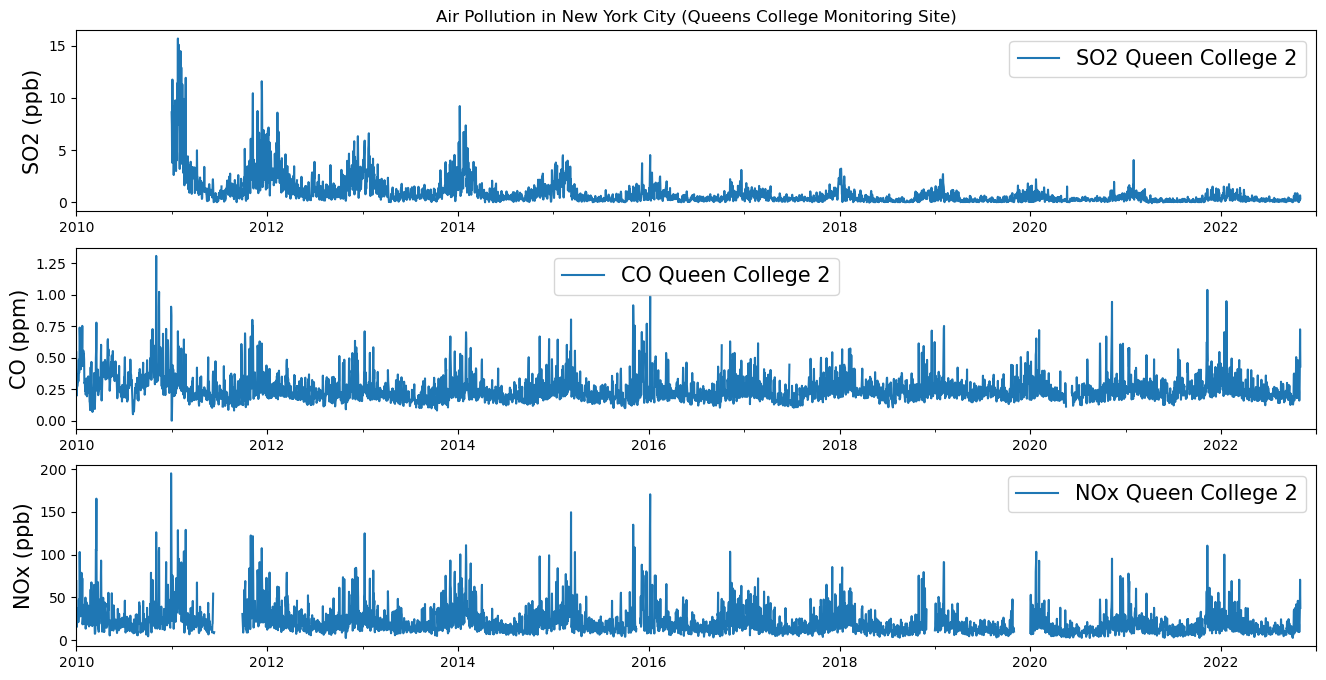

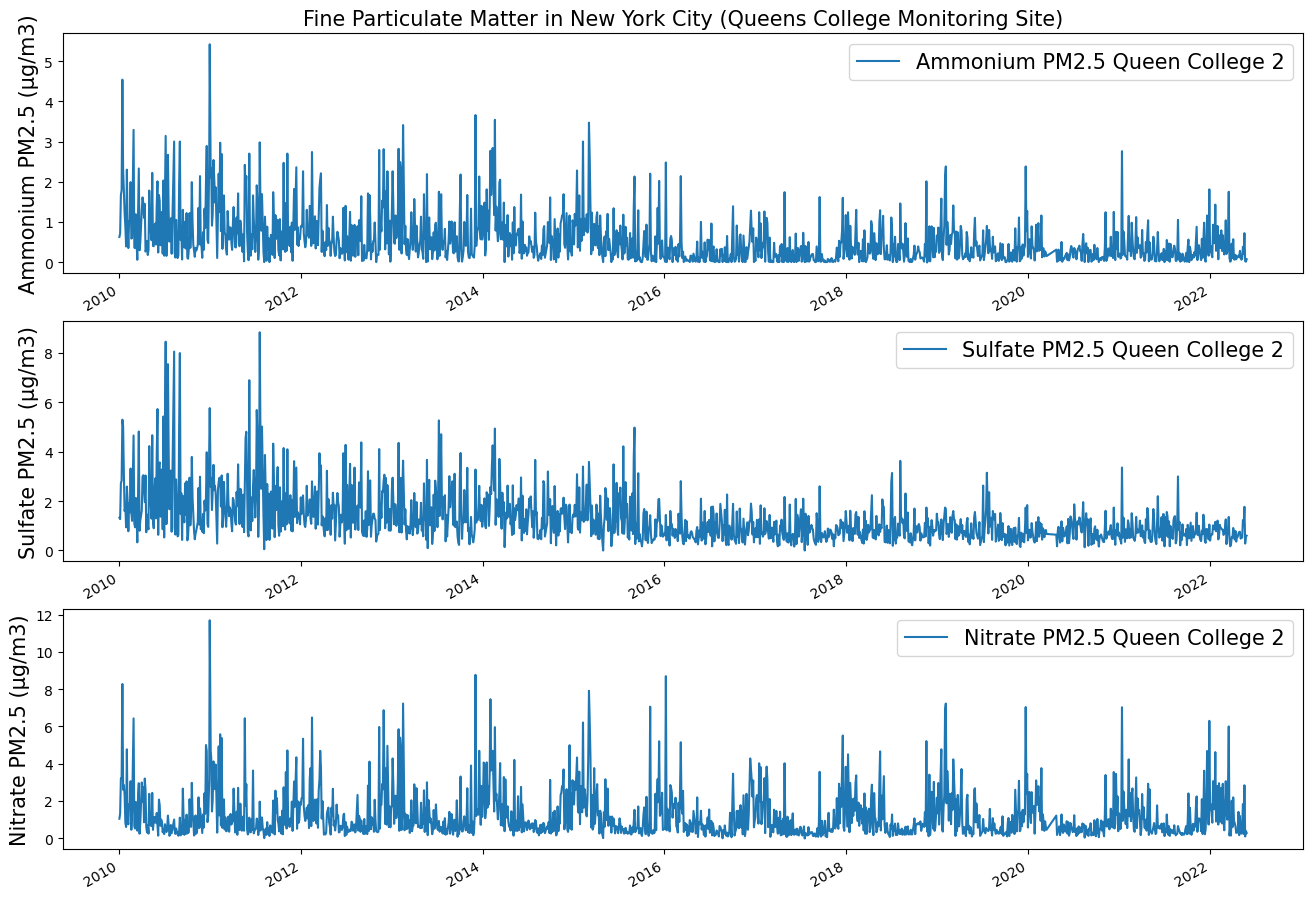

In [12]:
Queen = Data.filter(regex='Queen')

fig, axes = plt.subplots(figsize = (16,8),nrows = 3)
Queen['SO2 Queen College 2'].plot(ax=axes[0])
#Queen_pollutant['SO2 Queen College 2'].resample('3M').mean().plot(ax = axes[0],label = '3 Month Mean',color = 'k')
Queen['NOx Queen College 2'].plot(ax=axes[2])
#Queen_pollutant['NOx Queen College 2'].resample('3M').mean().plot(ax = axes[1],label = '3 Month Mean',color = 'k')
Queen['CO Queen College 2'].plot(ax=axes[1])
axes[0].set_ylabel('SO2 (ppb)',fontsize = 15)
axes[2].set_ylabel('NOx (ppb)',fontsize = 15)
axes[1].set_ylabel('CO (ppm)',fontsize = 15)
#axes[3].set_ylabel('NO2 (oob)')
axes[0].set_title('Air Pollution in New York City (Queens College Monitoring Site)')
axes[0].legend(fontsize = 15)
axes[2].legend(fontsize = 15)
axes[1].legend(fontsize = 15)

fig2, ax = plt.subplots(figsize = (16,12),nrows = 3)
Queen['Ammonium PM2.5 Queen College 2'].dropna().plot(ax=ax[0])
#Q['Ammonium PM2.5 Queen College 2'].resample('3M').mean().plot(ax = ax[0],label = '3 Month Mean',color = 'k')
Queen['Nitrate PM2.5 Queen College 2'].dropna().plot(ax = ax[2])
#Q['Nitrate PM2.5 Queen College 2'].resample('3M').mean().plot(ax = ax[1],label = '3 Month Mean',color = 'k')
Queen['Sulfate PM2.5 Queen College 2'].dropna().plot(ax = ax[1])
#Q['Sulfate PM2.5 Queen College 2'].resample('3M').mean().plot(ax = ax[2],label = '3 Month Mean',color = 'k')
ax[0].set_ylabel('Ammonium PM2.5 (μg/m3)',fontsize = 15)
ax[2].set_ylabel('Nitrate PM2.5 (μg/m3)',fontsize = 15)
ax[1].set_ylabel('Sulfate PM2.5 (μg/m3)',fontsize = 15)
ax[0].set_title('Fine Particulate Matter in New York City (Queens College Monitoring Site)',fontsize = 15)
ax[0].legend(fontsize = 15)
ax[2].legend(fontsize = 15)
ax[1].legend(fontsize = 15)

## Speciated PM2.5

For speciate PM2.5, resampled the data as seasonal (3M) and annual, then calculate the mean of each season and annual.
<br>
<br>
The figure shows that all speciated PM2.5 have strong seasonal cycles. For Ammonium and Sulfate PM 2.5, there are significant decreases over 12 years, especially from 2012 to 2016, when CHP happened. After 2018, the decreasing trend slowed down and almost had a flat changing rate. 
For Nitrate PM2.5, there are seasonal cycles as well, but the decrease over the years is not very noticeable. 
<br>
<br>
There are no noticeable speciated PM2.5 level differences between NYC and NJ 
<br>
<br>
The specific number of PM2.5 changes shown above the figure: 
<br>
Sulfate PM2.5 changed largest: more than 1 $μg/m^3$
<br>
Ammonium PM2.5: around 0.7 $μg/m^3$
<br>
Nitrate PM2.5: around 0.3 $μg/m^3$, even saw increase for Newark Firehouse monitor site

Ammonium PM2.5 NY IS#52 Level Diff between 2010 and 2018: 0.7418564049586778 μg/m3
Ammonium PM2.5 NY Division Street Level Diff between 2010 and 2018: 0.6859106060606062 μg/m3
Ammonium PM2.5 Queen College 2 Level Diff between 2010 and 2018: 0.6807471264367816 μg/m3
Ammonium PM2.5 NJ Elizabeth Lab Level Diff between 2010 and 2018: 0.5246938983050848 μg/m3
Ammonium PM2.5 NJ Newark Firehouse Level Diff between 2010 and 2018: 0.44932506887052337 μg/m3
Sulfate PM2.5 NY IS#52 Level Diff between 2010 and 2018: 1.449250147579693 μg/m3
Sulfate PM2.5 NY Division Street Level Diff between 2010 and 2018: 1.6082848484848484 μg/m3
Sulfate PM2.5 Queen College 2 Level Diff between 2010 and 2018: 1.3582879457707047 μg/m3
Sulfate PM2.5 NJ Elizabeth Lab Level Diff between 2010 and 2018: 1.194042372881356 μg/m3
Sulfate PM2.5 NJ Newark Firehouse Level Diff between 2010 and 2018: 1.06931652892562 μg/m3
Nitrate PM2.5 NY IS#52 Level Diff between 2010 and 2018: 0.4836875737898465 μg/m3
Nitrate PM2.5 NY Divisio

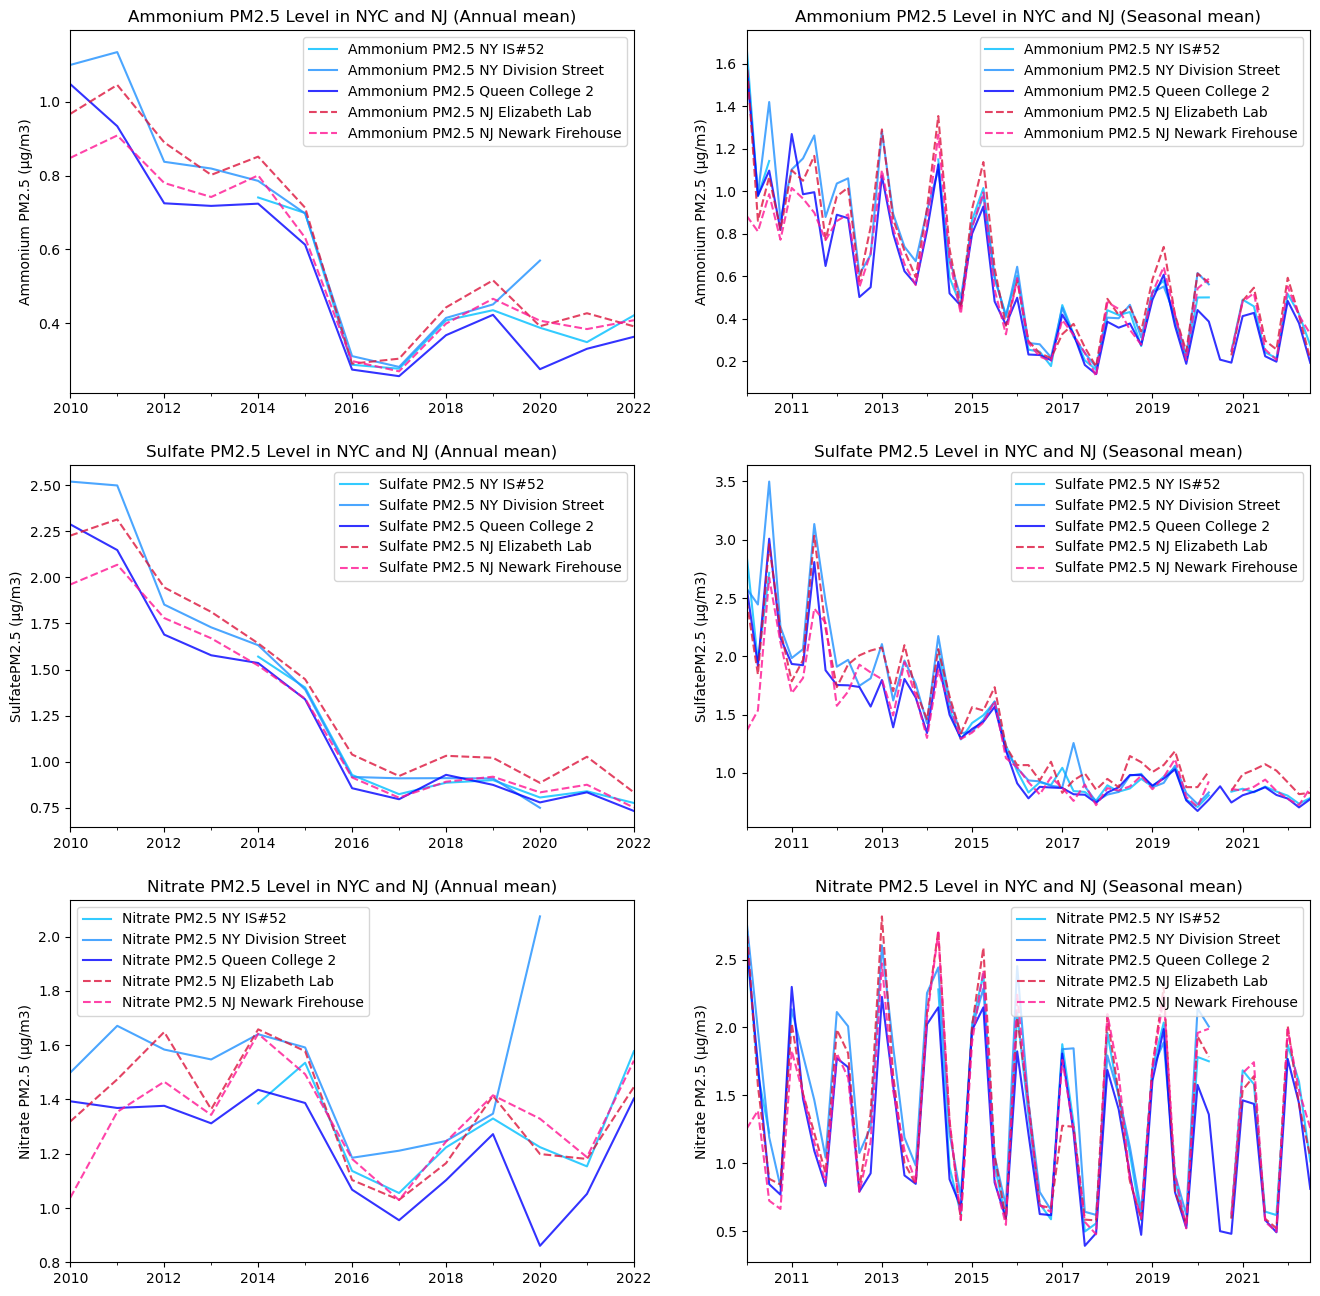

In [13]:
plt.rcParams['figure.figsize'] = (16,16)
ax1 = plt.subplot(3,2,1)
Data['Ammonium PM2.5 NY IS#52'].dropna().resample('Y').mean().plot(ax=ax1,alpha = 0.8, color = 'deepskyblue')
print('Ammonium PM2.5 NY IS#52 Level Diff between 2010 and 2018:',Data['Ammonium PM2.5 NY IS#52'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')
Data['Ammonium PM2.5 NY Division Street'].dropna().resample('Y').mean().plot(ax=ax1, alpha = 0.8,  color = 'dodgerblue')
print('Ammonium PM2.5 NY Division Street Level Diff between 2010 and 2018:',Data['Ammonium PM2.5 NY Division Street'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')
Data['Ammonium PM2.5 Queen College 2'].dropna().resample('Y').mean().plot(ax=ax1,alpha = 0.8,color = 'blue')
print('Ammonium PM2.5 Queen College 2 Level Diff between 2010 and 2018:',Data['Ammonium PM2.5 Queen College 2'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')

Data['Ammonium PM2.5 NJ Elizabeth Lab'].dropna().resample('Y').mean().plot(ax=ax1,alpha = 0.8, color = 'crimson', linestyle = '--')
print('Ammonium PM2.5 NJ Elizabeth Lab Level Diff between 2010 and 2018:',Data['Ammonium PM2.5 NJ Elizabeth Lab'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')
Data['Ammonium PM2.5 NJ Newark Firehouse'].dropna().resample('Y').mean().plot(ax=ax1, alpha = 0.8 ,color = 'deeppink',linestyle = '--')
print('Ammonium PM2.5 NJ Newark Firehouse Level Diff between 2010 and 2018:',Data['Ammonium PM2.5 NJ Newark Firehouse'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')

ax1.set_title('Ammonium PM2.5 Level in NYC and NJ (Annual mean)')
ax1.set_ylabel('Ammonium PM2.5 (μg/m3)')
ax1.legend()

ax2 = plt.subplot(3,2,2)
Data['Ammonium PM2.5 NY IS#52'].dropna().resample('3M').mean().plot(ax=ax2,alpha = 0.8, color = 'deepskyblue')
Data['Ammonium PM2.5 NY Division Street'].dropna().resample('3M').mean().plot(ax=ax2, alpha = 0.8,  color = 'dodgerblue')
Data['Ammonium PM2.5 Queen College 2'].dropna().resample('3M').mean().plot(ax=ax2,alpha = 0.8,color = 'blue')

Data['Ammonium PM2.5 NJ Elizabeth Lab'].dropna().resample('3M').mean().plot(ax=ax2,alpha = 0.8, color = 'crimson', linestyle = '--')
Data['Ammonium PM2.5 NJ Newark Firehouse'].dropna().resample('3M').mean().plot(ax=ax2, alpha = 0.8 ,color = 'deeppink',linestyle = '--')

ax2.set_title('Ammonium PM2.5 Level in NYC and NJ (Seasonal mean)')
ax2.set_ylabel('Ammonium PM2.5 (μg/m3)')
ax2.legend()

ax3 = plt.subplot(3,2,3)
Data['Sulfate PM2.5 NY IS#52'].dropna().resample('Y').mean().plot(ax=ax3,alpha = 0.8,color = 'deepskyblue')
print('Sulfate PM2.5 NY IS#52 Level Diff between 2010 and 2018:',Data['Sulfate PM2.5 NY IS#52'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')
Data['Sulfate PM2.5 NY Division Street'].dropna().resample('Y').mean().plot(ax=ax3, alpha = 0.8,color = 'dodgerblue')
print('Sulfate PM2.5 NY Division Street Level Diff between 2010 and 2018:',Data['Sulfate PM2.5 NY Division Street'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')
Data['Sulfate PM2.5 Queen College 2'].dropna().resample('Y').mean().plot(ax=ax3,alpha = 0.8,color = 'blue')
print('Sulfate PM2.5 Queen College 2 Level Diff between 2010 and 2018:',Data['Sulfate PM2.5 Queen College 2'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')


Data['Sulfate PM2.5 NJ Elizabeth Lab'].dropna().resample('Y').mean().plot(ax=ax3,alpha = 0.8,color = 'crimson', linestyle = '--')
print('Sulfate PM2.5 NJ Elizabeth Lab Level Diff between 2010 and 2018:',Data['Sulfate PM2.5 NJ Elizabeth Lab'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')
Data['Sulfate PM2.5 NJ Newark Firehouse'].dropna().resample('Y').mean().plot(ax=ax3, alpha = 0.8,color = 'deeppink', linestyle = '--')
print('Sulfate PM2.5 NJ Newark Firehouse Level Diff between 2010 and 2018:',Data['Sulfate PM2.5 NJ Newark Firehouse'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')


ax3.set_title('Sulfate PM2.5 Level in NYC and NJ (Annual mean)')
ax3.set_ylabel('SulfatePM2.5 (μg/m3)')
ax3.legend()

ax4 = plt.subplot(3,2,4)
Data['Sulfate PM2.5 NY IS#52'].dropna().resample('3M').mean().plot(ax=ax4,alpha = 0.8,color = 'deepskyblue')
Data['Sulfate PM2.5 NY Division Street'].dropna().resample('3M').mean().plot(ax=ax4, alpha = 0.8,color = 'dodgerblue')
Data['Sulfate PM2.5 Queen College 2'].dropna().resample('3M').mean().plot(ax=ax4,alpha = 0.8,color = 'blue')

Data['Sulfate PM2.5 NJ Elizabeth Lab'].dropna().resample('3M').mean().plot(ax=ax4,alpha = 0.8,color = 'crimson', linestyle = '--')
Data['Sulfate PM2.5 NJ Newark Firehouse'].dropna().resample('3M').mean().plot(ax=ax4, alpha = 0.8,color = 'deeppink', linestyle = '--')

ax4.set_title('Sulfate PM2.5 Level in NYC and NJ (Seasonal mean)')
ax4.set_ylabel('SulfatePM2.5 (μg/m3)')
ax4.legend()

ax6 = plt.subplot(3,2,6)
Data['Nitrate PM2.5 NY IS#52'].dropna().resample('3M').mean().plot(ax=ax6,alpha = 0.8, color = 'deepskyblue')
Data['Nitrate PM2.5 NY Division Street'].dropna().resample('3M').mean().plot(ax=ax6, alpha = 0.8, color = 'dodgerblue')
Data['Nitrate PM2.5 Queen College 2'].dropna().resample('3M').mean().plot(ax=ax6,alpha = 0.8,color = 'blue')

Data['Nitrate PM2.5 NJ Elizabeth Lab'].dropna().resample('3M').mean().plot(ax=ax6,alpha = 0.8,color = 'crimson', linestyle = '--' )
Data['Nitrate PM2.5 NJ Newark Firehouse'].dropna().resample('3M').mean().plot(ax=ax6, alpha = 0.8 ,color = 'deeppink', linestyle = '--')

ax6.set_title('Nitrate PM2.5 Level in NYC and NJ (Seasonal mean)')
ax6.set_ylabel('Nitrate PM2.5 (μg/m3)')
ax6.legend()

ax5 = plt.subplot(3,2,5)
Data['Nitrate PM2.5 NY IS#52'].dropna().resample('Y').mean().plot(ax=ax5,alpha = 0.8, color = 'deepskyblue')
print('Nitrate PM2.5 NY IS#52 Level Diff between 2010 and 2018:',Data['Nitrate PM2.5 NY IS#52'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')
Data['Nitrate PM2.5 NY Division Street'].dropna().resample('Y').mean().plot(ax=ax5, alpha = 0.8, color = 'dodgerblue')
print('Nitrate PM2.5 NY Division Street Level Diff between 2010 and 2018:',Data['Nitrate PM2.5 NY Division Street'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')
Data['Nitrate PM2.5 Queen College 2'].dropna().resample('Y').mean().plot(ax=ax5,alpha = 0.8,color = 'blue')
print('Nitrate PM2.5 Queen College 2 Level Diff between 2010 and 2018:',Data['Nitrate PM2.5 Queen College 2'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')


Data['Nitrate PM2.5 NJ Elizabeth Lab'].dropna().resample('Y').mean().plot(ax=ax5,alpha = 0.8,color = 'crimson', linestyle = '--' )
print('Nitrate PM2.5 NJ Elizabeth Lab Level Diff between 2010 and 2018:',Data['Nitrate PM2.5 NJ Elizabeth Lab'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')

Data['Nitrate PM2.5 NJ Newark Firehouse'].dropna().resample('Y').mean().plot(ax=ax5, alpha = 0.8 ,color = 'deeppink', linestyle = '--')
print('Nitrate PM2.5 NJ Newark Firehouse Level Diff between 2010 and 2018:',Data['Nitrate PM2.5 NJ Newark Firehouse'].dropna().resample('Y').mean().diff(periods = -8)[0],'μg/m3')


ax5.set_title('Nitrate PM2.5 Level in NYC and NJ (Annual mean)')
ax5.set_ylabel('Nitrate PM2.5 (μg/m3)')
ax5.legend()

## Gaseous Pollutants
For gas air pollutants, resampled the data as seasonal (3M) and annual, then calculate the mean of each season and annual.
<br>
<br>
The figure shows that SO$_2$ have strong seasonal cycles. For SO$_2$, there are significant decreases over 12 years. After 2018, the decreasing trend slowed down and almost had a flat changing rate. 
For NO$_x$ and NO$2$, there are seasonal cycles as well, but the decrease over the years is very noticeable too. 
<br>
<br>
There are no noticeable speciated CO level over 12 years.
<br>
<br>
It is interesting that NO$_x$ and NO$_2$ in NJ are all high level than NYC. We will look into this in next chapter.
<br>
<br>
The specific number of gas air pollutants changes shown above the figure: 
<br>
SO$_2$ changed largest: most sites are more than 1 ppb
<br>
NO$_x$ and NO$_2$: around  7 ppb
<br>
CO: not much changes

SO2 NY IS#52 Level Diff between 2010 and 2018: 1.6787201161592504 ppb
SO2 NY Pfizer Level Diff between 2010 and 2018: 4.101934194520548 ppb
SO2 Queen College 2 Level Diff between 2010 and 2018: 2.2737428084223996 ppb
SO2 NJ Elizabeth Lab Level Diff between 2010 and 2018: 1.2075730433195464 ppb
SO2 NJ Elizabeth Level Diff between 2010 and 2018: 0.46173470136986305 ppb
SO2 NJ Jersey City Level Diff between 2010 and 2018: 1.2069836911450844 ppb
CO CCNY Level Diff between 2010 and 2018: 0.20479222303082195 ppm
CO Queen College 2 Level Diff between 2010 and 2018: 0.09318993681318682 ppm
CO NJ Elizabeth Lab Level Diff between 2010 and 2018: 0.021486059807560243 ppm
CO NJ Elizabeth Level Diff between 2010 and 2018: 0.08415281917808215 ppm
CO NJ Jersey City Level Diff between 2010 and 2018: 0.19138226577967482 ppm
NOx NY IS#52 Level Diff between 2010 and 2018: 12.793655489189895 ppb
NOx NY Pfizer Level Diff between 2010 and 2018: 8.247212068855 ppb
NOx Queen College 2 Level Diff between 2010 a

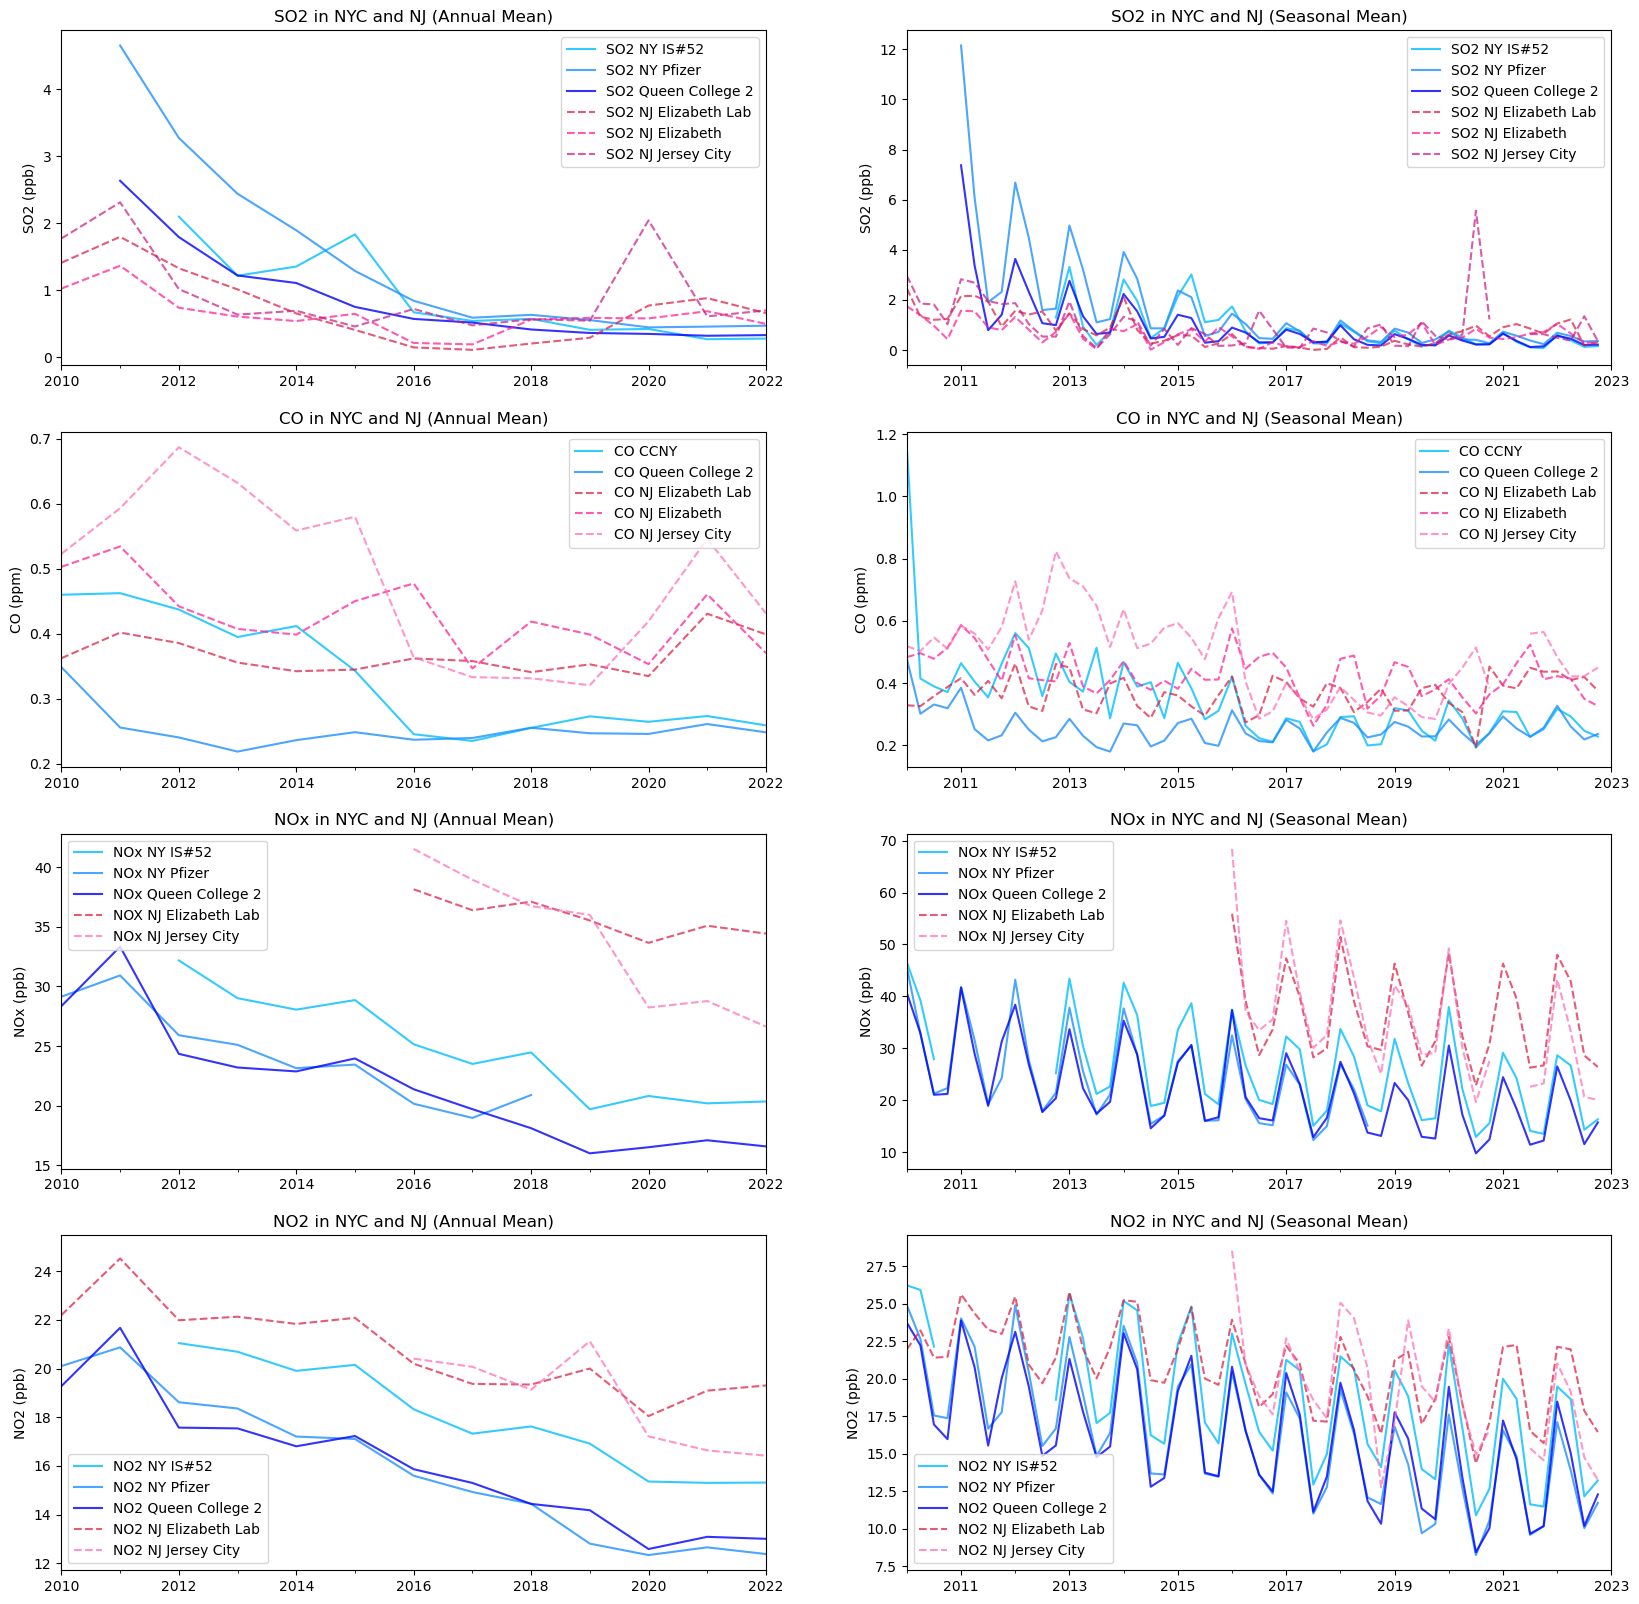

In [14]:
plt.rcParams['figure.figsize'] = (20,20)
ax1 = plt.subplot(4,2,1)
Data['SO2 NY IS#52'].resample('Y').mean().plot(ax=ax1,alpha = 0.8,color = 'deepskyblue')
print('SO2 NY IS#52 Level Diff between 2010 and 2018:',Data['SO2 NY IS#52'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['SO2 NY Pfizer'].resample('Y').mean().plot(ax=ax1, alpha = 0.8,color = 'dodgerblue')
print('SO2 NY Pfizer Level Diff between 2010 and 2018:',Data['SO2 NY Pfizer'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['SO2 Queen College 2'].resample('Y').mean().plot(ax=ax1, alpha = 0.8,color = 'blue')
print('SO2 Queen College 2 Level Diff between 2010 and 2018:',Data['SO2 Queen College 2'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')

Data['SO2 NJ Elizabeth Lab'].resample('Y').mean().plot(ax=ax1,alpha = 0.7,color = 'crimson',linestyle = '--')
print('SO2 NJ Elizabeth Lab Level Diff between 2010 and 2018:',Data['SO2 NJ Elizabeth Lab'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['SO2 NJ Elizabeth'].resample('Y').mean().plot(ax=ax1,alpha = 0.7,color = 'deeppink',linestyle = '--')
print('SO2 NJ Elizabeth Level Diff between 2010 and 2018:',Data['SO2 NJ Elizabeth'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['SO2 NJ Jersey City'].resample('Y').mean().plot(ax=ax1, alpha = 0.7 ,color = 'mediumvioletred',linestyle = '--')
print('SO2 NJ Jersey City Level Diff between 2010 and 2018:',Data['SO2 NJ Jersey City'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')

ax1.set_title('SO2 in NYC and NJ (Annual Mean)')
ax1.set_ylabel('SO2 (ppb)')
ax1.legend()

ax2 = plt.subplot(4,2,2)
Data['SO2 NY IS#52'].resample('3M').mean().plot(ax=ax2,alpha = 0.8,color = 'deepskyblue')
Data['SO2 NY Pfizer'].resample('3M').mean().plot(ax=ax2, alpha = 0.8,color = 'dodgerblue')
Data['SO2 Queen College 2'].resample('3M').mean().plot(ax=ax2, alpha = 0.8,color = 'blue')

Data['SO2 NJ Elizabeth Lab'].resample('3M').mean().plot(ax=ax2,alpha = 0.7,color = 'crimson',linestyle = '--')
Data['SO2 NJ Elizabeth'].resample('3M').mean().plot(ax=ax2,alpha = 0.7,color = 'deeppink',linestyle = '--')
Data['SO2 NJ Jersey City'].resample('3M').mean().plot(ax=ax2, alpha = 0.7 ,color = 'mediumvioletred',linestyle = '--')

ax2.set_title('SO2 in NYC and NJ (Seasonal Mean)')
ax2.set_ylabel('SO2 (ppb)')
ax2.legend()

ax3 = plt.subplot(4,2,3)
Data['CO CCNY'].resample('Y').mean().plot(ax=ax3,alpha = 0.8,color = 'deepskyblue')
print('CO CCNY Level Diff between 2010 and 2018:',Data['CO CCNY'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppm')
Data['CO Queen College 2'].resample('Y').mean().plot(ax=ax3, alpha = 0.8,color = 'dodgerblue')
print('CO Queen College 2 Level Diff between 2010 and 2018:',Data['CO Queen College 2'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppm')

Data['CO NJ Elizabeth Lab'].resample('Y').mean().plot(ax=ax3,alpha = 0.7,color = 'crimson',linestyle = '--')
print('CO NJ Elizabeth Lab Level Diff between 2010 and 2018:',Data['CO NJ Elizabeth Lab'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppm')
Data['CO NJ Elizabeth'].resample('Y').mean().plot(ax=ax3,alpha = 0.7,color = 'deeppink',linestyle = '--')
print('CO NJ Elizabeth Level Diff between 2010 and 2018:',Data['CO NJ Elizabeth'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppm')
Data['CO NJ Jersey City'].resample('Y').mean().plot(ax=ax3, alpha = 0.7 ,color = 'hotpink',linestyle = '--')
print('CO NJ Jersey City Level Diff between 2010 and 2018:',Data['CO NJ Jersey City'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppm')

ax3.set_title('CO in NYC and NJ (Annual Mean)')
ax3.set_ylabel('CO (ppm)')
ax3.legend()

ax4 = plt.subplot(4,2,4)
Data['CO CCNY'].resample('3M').mean().plot(ax=ax4,alpha = 0.8,color = 'deepskyblue')
Data['CO Queen College 2'].resample('3M').mean().plot(ax=ax4, alpha = 0.8,color = 'dodgerblue')

Data['CO NJ Elizabeth Lab'].resample('3M').mean().plot(ax=ax4,alpha = 0.7,color = 'crimson',linestyle = '--')
Data['CO NJ Elizabeth'].resample('3M').mean().plot(ax=ax4,alpha = 0.7,color = 'deeppink',linestyle = '--')
Data['CO NJ Jersey City'].resample('3M').mean().plot(ax=ax4, alpha = 0.7 ,color = 'hotpink',linestyle = '--')

ax4.set_title('CO in NYC and NJ (Seasonal Mean)')
ax4.set_ylabel('CO (ppm)')
ax4.legend()

ax5 = plt.subplot(4,2,5)
Data['NOx NY IS#52'].resample('Y').mean().plot(ax=ax5,alpha = 0.8,color = 'deepskyblue')
print('NOx NY IS#52 Level Diff between 2010 and 2018:',Data['NOx NY IS#52'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['NOx NY Pfizer'].resample('Y').mean().plot(ax=ax5, alpha = 0.8,color = 'dodgerblue')
print('NOx NY Pfizer Level Diff between 2010 and 2018:',Data['NOx NY Pfizer'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['NOx Queen College 2'].resample('Y').mean().plot(ax=ax5, alpha = 0.8,color = 'blue')
print('NOx Queen College 2 Level Diff between 2010 and 2018:',Data['NOx Queen College 2'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')


Data['NOX NJ Elizabeth Lab'].resample('Y').mean().plot(ax=ax5,alpha = 0.7,color = 'crimson',linestyle = '--')
print('NOX NJ Elizabeth Lab Level Diff between 2010 and 2018:',Data['NOX NJ Elizabeth Lab'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['NOx NJ Jersey City'].resample('Y').mean().plot(ax=ax5, alpha = 0.7 ,color = 'hotpink',linestyle = '--')
print('NOx NJ Jersey City Level Diff between 2010 and 2018:',Data['NOx NJ Jersey City'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')

ax5.set_title('NOx in NYC and NJ (Annual Mean)')
ax5.set_ylabel('NOx (ppb)')
ax5.legend()

ax6 = plt.subplot(4,2,6)
Data['NOx NY IS#52'].resample('3M').mean().plot(ax=ax6,alpha = 0.8,color = 'deepskyblue')
Data['NOx NY Pfizer'].resample('3M').mean().plot(ax=ax6, alpha = 0.8,color = 'dodgerblue')
Data['NOx Queen College 2'].resample('3M').mean().plot(ax=ax6, alpha = 0.8,color = 'blue')

Data['NOX NJ Elizabeth Lab'].resample('3M').mean().plot(ax=ax6,alpha = 0.7,color = 'crimson',linestyle = '--')
Data['NOx NJ Jersey City'].resample('3M').mean().plot(ax=ax6, alpha = 0.7 ,color = 'hotpink',linestyle = '--')

ax6.set_title('NOx in NYC and NJ (Seasonal Mean)')
ax6.set_ylabel('NOx (ppb)')
ax6.legend()

ax7 = plt.subplot(4,2,7)
Data['NO2 NY IS#52'].resample('Y').mean().plot(ax=ax7,alpha = 0.8,color = 'deepskyblue')
print('NO2 NY IS#52 Level Diff between 2010 and 2018:',Data['NO2 NY IS#52'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['NO2 NY Pfizer'].resample('Y').mean().plot(ax=ax7, alpha = 0.8,color = 'dodgerblue')
print('NO2 NY Pfizer Level Diff between 2010 and 2018:',Data['NO2 NY Pfizer'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['NO2 Queen College 2'].resample('Y').mean().plot(ax=ax7, alpha = 0.8,color = 'blue')
print('NO2 Queen College 2 Level Diff between 2010 and 2018:',Data['NO2 Queen College 2'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')

Data['NO2 NJ Elizabeth Lab'].resample('Y').mean().plot(ax=ax7,alpha = 0.7,color = 'crimson',linestyle = '--')
print('NO2 NJ Elizabeth Lab Level Diff between 2010 and 2018:',Data['NO2 NJ Elizabeth Lab'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')
Data['NO2 NJ Jersey City'].resample('Y').mean().plot(ax=ax7, alpha = 0.7 ,color = 'hotpink',linestyle = '--')
print('NO2 NJ Jersey City Level Diff between 2010 and 2018:',Data['NO2 NJ Jersey City'].dropna().resample('Y').mean().diff(periods = -8)[0],'ppb')

ax7.set_title('NO2 in NYC and NJ (Annual Mean)')
ax7.set_ylabel('NO2 (ppb)')
ax7.legend()

ax8 = plt.subplot(4,2,8)
Data['NO2 NY IS#52'].resample('3M').mean().plot(ax=ax8,alpha = 0.8,color = 'deepskyblue')
Data['NO2 NY Pfizer'].resample('3M').mean().plot(ax=ax8, alpha = 0.8,color = 'dodgerblue')
Data['NO2 Queen College 2'].resample('3M').mean().plot(ax=ax8, alpha = 0.8,color = 'blue')

Data['NO2 NJ Elizabeth Lab'].resample('3M').mean().plot(ax=ax8,alpha = 0.7,color = 'crimson',linestyle = '--')
Data['NO2 NJ Jersey City'].resample('3M').mean().plot(ax=ax8, alpha = 0.7 ,color = 'hotpink',linestyle = '--')

ax8.set_title('NO2 in NYC and NJ (Seasonal Mean)')
ax8.set_ylabel('NO2 (ppb)')
ax8.legend()

# NO/NO2 Ratio to Check Why NJ has higher NOx and NO2 than NYC

The NO/NO2 ratio can be used to determine whether the pollution plume is fresh. 
During combustion, N$_2$ is oxidized to NO, and in the atmosphere, very important reaction oxides NO to NO$_2$:
<br>
NO + O3 → NO2 + O2 + hν
<br>
This reaction can happen in a few minutes. Therefore, when the monitor site is close to the pollutant source, the NO/NO2 tends to be large, and vice versa. 
<br>
<br>
Here, I compared the NO/NO$_2$ ratio of NYC and NJ by applying the scatter plot of NO and NO2 and using linear regression to find the ratio.
Interestingly, all sites in NJ have NO.NO2 ratios are larger than 1 (around 1.5), and in NYC, the NO/NO2 ratios are all around 0.9. This means monitor sites in NJ are closer to the pollutant source than those monitor sites in NYC.

In [15]:
# Create a empty NO dataset 
# Calculate NO using NOX - NO2
NO = NO2 * 0
NO.columns = ['NO NY IS#52','NO NY Pfizer','NO Queen College 2','NO NJ Elizabeth Lab','NO NJ Jersey City'];
NO['NO NY IS#52'] = NOx['NOx NY IS#52'] - NO2['NO2 NY IS#52']
NO['NO NY Pfizer'] = NOx['NOx NY Pfizer'] - NO2['NO2 NY Pfizer']
NO['NO NJ Elizabeth Lab'] = NOx['NOX NJ Elizabeth Lab'] - NO2['NO2 NJ Elizabeth Lab']
NO['NO NJ Jersey City'] = NOx['NOx NJ Jersey City'] - NO2['NO2 NJ Jersey City']
NO['NO Queen College 2'] = NOx['NOx Queen College 2']- NO2['NO2 Queen College 2']
NO2_NO = pd.concat([NO,NO2],axis = 1)

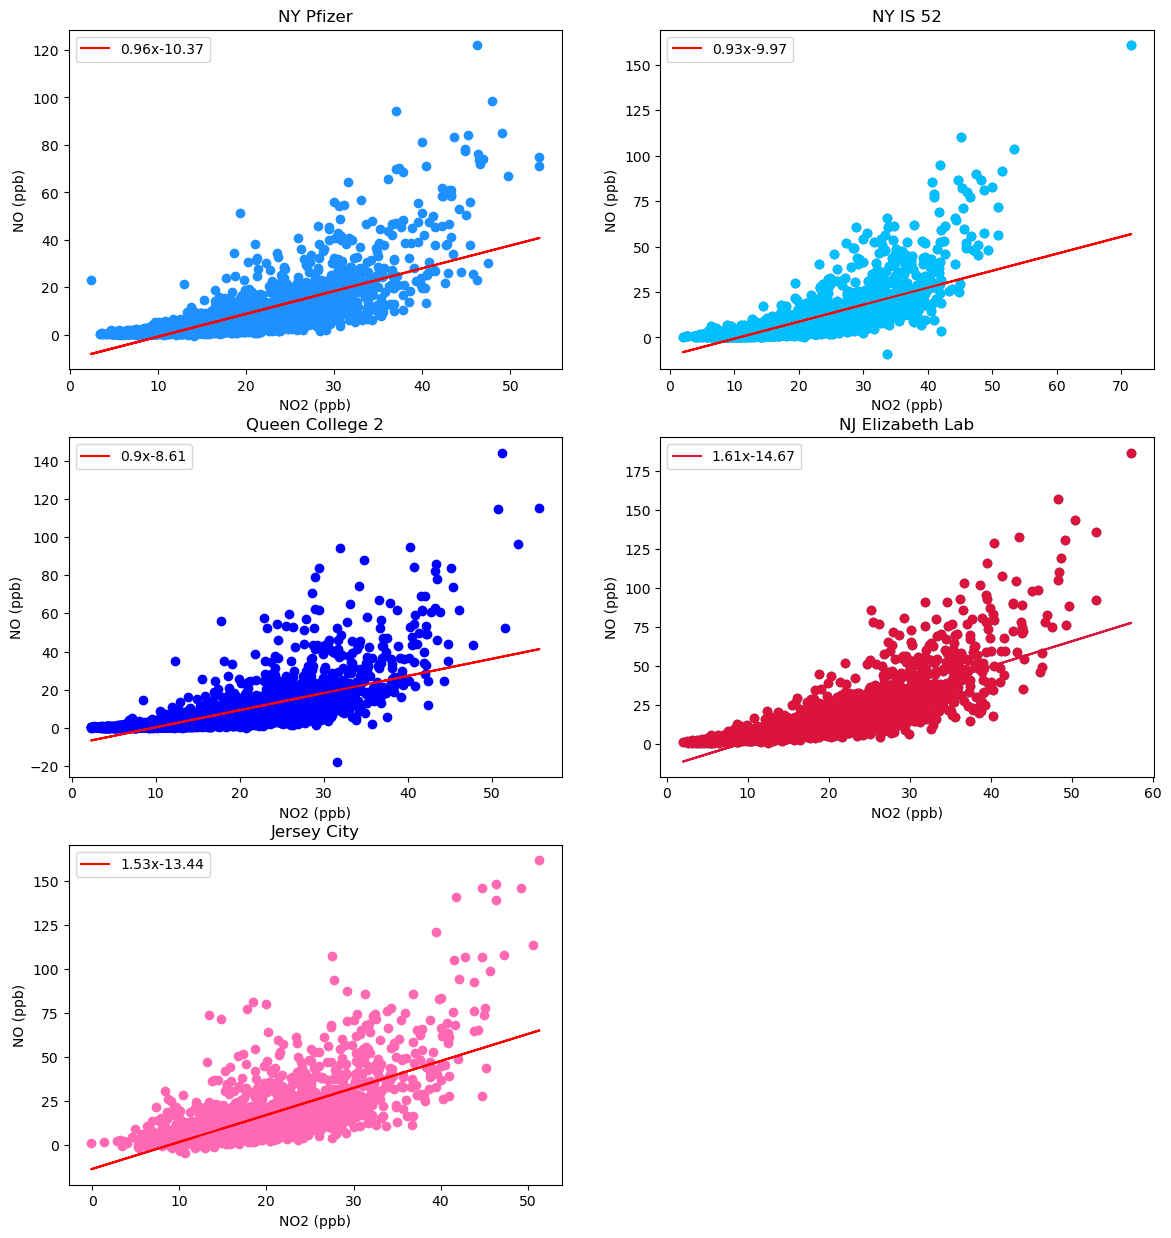

In [16]:
plt.rcParams['figure.figsize'] = (14, 15)
ax1 = plt.subplot(3,2,1)
Pfizer = pd.concat([NO2_NO['NO2 NY Pfizer'],NO2_NO['NO NY Pfizer']],axis = 1)
Pfizer = Pfizer.dropna()
plt.scatter(x = Pfizer['NO2 NY Pfizer'], y= Pfizer['NO NY Pfizer'],color = 'dodgerblue')
plt.xlabel('NO2 (ppb)')
plt.ylabel('NO (ppb)')
plt.title('NY Pfizer')
X = Pfizer.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = Pfizer.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
a = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
plt.plot(X, Y_pred, color='red', label = '{}x{}'.format(np.round(a,2),np.round(b,2)))
ax1.legend()

ax2 = plt.subplot(3,2,2)
plt.scatter(NO2_NO['NO2 NY IS#52'],NO2_NO['NO NY IS#52'])
IS52 = pd.concat([NO2_NO['NO2 NY IS#52'],NO2_NO['NO NY IS#52']],axis = 1)
IS52 = IS52.dropna()
plt.scatter(x = IS52['NO2 NY IS#52'], y= IS52['NO NY IS#52'],color = 'deepskyblue')
plt.xlabel('NO2 (ppb)')
plt.ylabel('NO (ppb)')
plt.title('NY IS 52')
X = IS52.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = IS52.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
a = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
plt.plot(X, Y_pred, color='red',label = '{}x{}'.format(np.round(a,2),np.round(b,2)))
ax2.legend()

ax3 = plt.subplot(3,2,3)
Queen_R = pd.concat([NO2_NO['NO2 Queen College 2'],NO2_NO['NO Queen College 2']],axis = 1)
Queen_R  = Queen_R.dropna()
plt.scatter(x = Queen_R['NO2 Queen College 2'], y= Queen_R['NO Queen College 2'],color = 'blue')
X = Queen_R .iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = Queen_R .iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
a = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
Y_pred = linear_regressor.predict(X)
plt.plot(X, Y_pred, color='red',label = '{}x{}'.format(np.round(a,2),np.round(b,2)))
plt.title('Queen College 2')
plt.xlabel('NO2 (ppb)')
plt.ylabel('NO (ppb)')
ax3.legend()


ax4 = plt.subplot(3,2,4)
plt.scatter(NO2_NO['NO2 NJ Elizabeth Lab'],NO2_NO['NO NJ Elizabeth Lab'])
EL = pd.concat([NO2_NO['NO2 NJ Elizabeth Lab'],NO2_NO['NO NJ Elizabeth Lab']],axis = 1)
EL = EL.dropna()
plt.scatter(x = EL['NO2 NJ Elizabeth Lab'], y= EL['NO NJ Elizabeth Lab'],color = 'crimson')
plt.xlabel('NO2 (ppb)')
plt.ylabel('NO (ppb)')
plt.title('NJ Elizabeth Lab')
X = EL.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = EL.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
#plt.scatter(X, Y)
a = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
plt.plot(X, Y_pred, color='crimson',label = '{}x{}'.format(np.round(a,2),np.round(b,2)))
ax4.legend()

ax5 = plt.subplot(3,2,5)
JC = pd.concat([NO2_NO['NO2 NJ Jersey City'],NO2_NO['NO NJ Jersey City']],axis = 1)
JC = JC.dropna()
plt.scatter(x = JC['NO2 NJ Jersey City'], y= JC['NO NJ Jersey City'],color = 'hotpink')
plt.xlabel('NO2 (ppb)')
plt.ylabel('NO (ppb)')
plt.title('NJ Jersey City')
X = JC.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = JC.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
#plt.scatter(X, Y)
a = linear_regressor.coef_[0][0]
b = linear_regressor.intercept_[0]
plt.plot(X, Y_pred, color='red',label = '{}x{}'.format(np.round(a,2),np.round(b,2)))

plt.title('Jersey City')
plt.xlabel('NO2 (ppb)')
plt.ylabel('NO (ppb)')
ax5.legend()

# Appendix

#url_base= 'https://aqs.epa.gov/data/api/dailyData/byState?email=yz4343@columbia.edu&key=saffronhawk77'
# param = 88301 for ammonium PM2.5
# param = 88403 for sulfate PM2.5
# param = 88306 for nitrate PM2.5
# param = 42101 for CO
# param = 42603 for NOx
# param = 42401 for SO2
# State Code = 36 for NY
# State Code = 34 for NJ
# Time period = 2010-2018
#def info(param,year,state):
    url_info = '&param='+ str(param) + '&bdate=' + str(year) +'0101&edate=' + str(year) +'1231&state=' + str(state)
    return url_info
D = {'CO': 42101, 'NOx': 42603, 'NO2': 42602, 'SO2': 42401,'Ammonium_PM2.5':88301,'Sulfate_PM2.5':88403, 'Nitrate_PM2.5': 88306}
S =  {'NY': 36, 'NJ': 34}
Y = np.arange(2010,2023,1) # Time range
df_ap = pd.DataFrame()
for key, value in S.items():
    print(key)
d = {}
for skey, sd in S.items():
    state = sd
    for dkey, dd in D.items():
        for i in range(0,len(Y)):
            year = Y[i]
            param = dd
            url_info = info(param,year,state)
            url_base = 'https://aqs.epa.gov/data/api/dailyData/byState?email=yz4343@columbia.edu&key=saffronhawk77'
            url = url_base + url_info
            response = requests.get(url).json();
            Data = response['Data'];
            df = pd.json_normalize(response['Data']);
            df_ap = pd.concat([df_ap,df])
            d["{}_{}".format(dkey,skey)] = df_ap
                
for i in range(0,len(Y)):
    year = Y[i]
    url_info = info(param,year,state)
    url_base = 'https://aqs.epa.gov/data/api/dailyData/byState?email=yz4343@columbia.edu&key=saffronhawk77'
    url = url_base + url_info
    response = requests.get(url).json();
    Data = response['Data'];
    df = pd.json_normalize(response['Data']);
    df_ap = pd.concat([df_ap,df])
df_ap.to_csv("{}_{}.cvs".format(name,s_name))
df_ap